<a href="https://colab.research.google.com/github/Jae2Wook/Machine-Learning-Class/blob/main/Copy_of_starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
housing.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
housing.date.str.split("T").str.get(0)
housing.date = pd.to_datetime(housing.date)
housing.head()

id       date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1  6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2  5631500400 2015-02-25  180000.0  ... -122.233           2720        8062
3  2487200875 2014-12-09  604000.0  ... -122.393           1360        5000
4  1954400510 2015-02-18  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
housing.date = pd.to_numeric(housing.date)

In [ ]:
myhousing = housing[["price","waterfront", "view", "condition", "grade", "sqft_living15"]]
myhousing.head()

price  waterfront  view  condition  grade  sqft_living15
0  221900.0           0     0          3      7           1340
1  538000.0           0     0          3      7           1690
2  180000.0           0     0          3      6           2720
3  604000.0           0     0          5      7           1360
4  510000.0           0     0          3      8           1800


Box plot of each numerical features


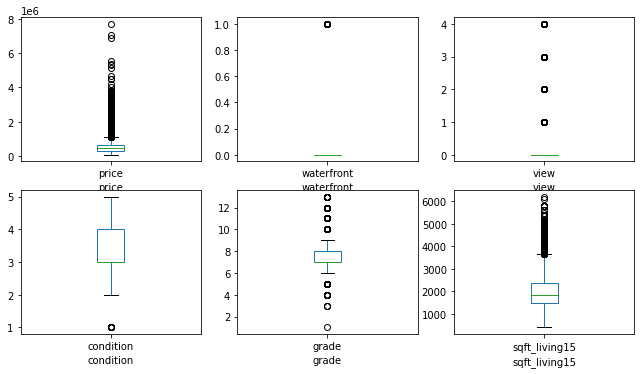


Histogram of each numerical features


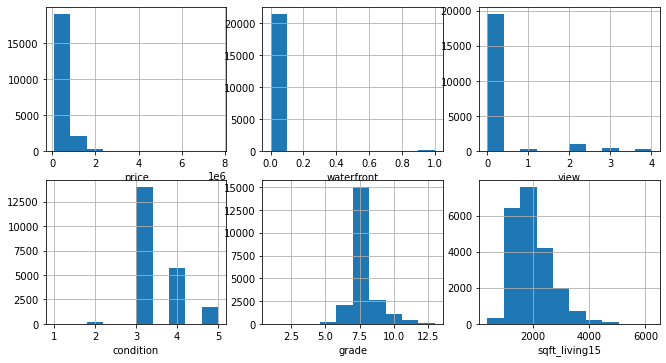

Pairplot

Correlation plot of numerical features
                  price  waterfront  ...     grade  sqft_living15
price          1.000000    0.266369  ...  0.667434       0.585379
waterfront     0.266369    1.000000  ...  0.082775       0.086463
view           0.397293    0.401857  ...  0.251321       0.280439
condition      0.036362    0.016653  ... -0.144674      -0.092824
grade          0.667434    0.082775  ...  1.000000       0.713202
sqft_living15  0.585379    0.086463  ...  0.713202       1.000000

[6 rows x 6 columns]


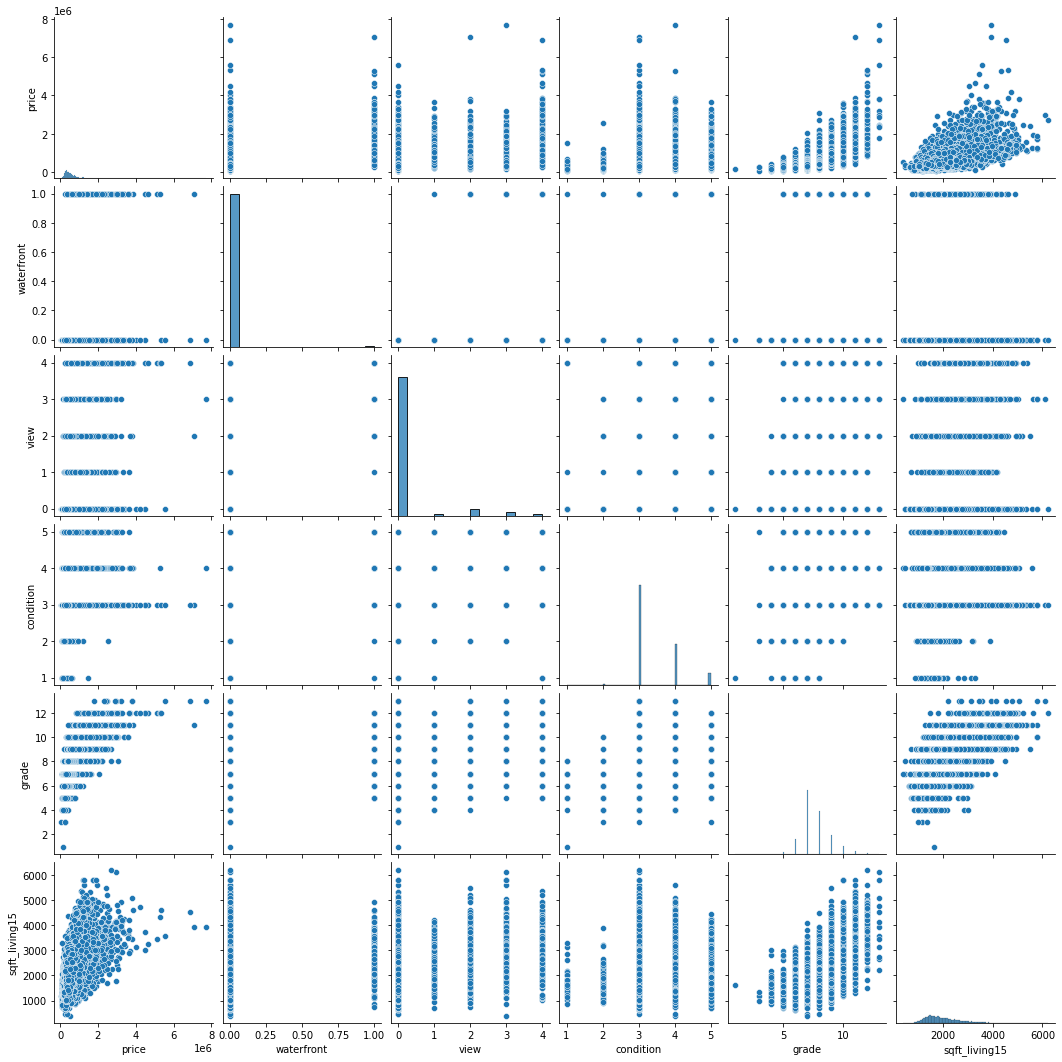

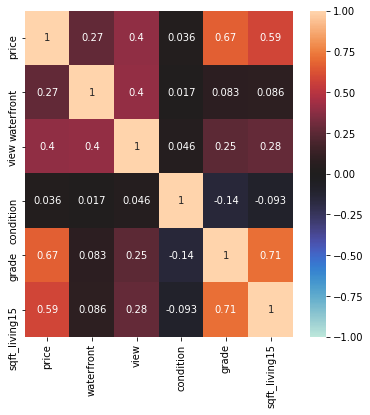

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = ["price","waterfront", "view", "condition", "grade", "sqft_living15"]
target = "price"

def data_visulization(feature_names, target, dataset):
  i = 1
  print(); print('Box plot of each numerical features')
  plt.figure(figsize = (11, 9))
  for col in feature_names:
    plt.subplot(3,3,i)
    plt.axis('on')
    plt.tick_params(axis = 'both')
    myhousing[col].plot(kind = "box", subplots = True, sharex = False, sharey = False)
    plt.xlabel(col)
    i += 1
  plt.show()

  j = 1
  print(); print('Histogram of each numerical features')
  plt.figure(figsize = (11, 9))
  for col in feature_names:
    plt.subplot(3,3,j)
    plt.axis('on')
    plt.tick_params(axis = 'both')
    myhousing[col].hist()
    plt.xlabel(col)
    j += 1
  plt.show()

  print("Pairplot")
  sns.pairplot(myhousing) #kind = "reg"

  print()
  print("Correlation plot of numerical features")

  corr = myhousing[feature_names].corr()
  print(corr)

  #mask = np.zeros_like(corr, dtype = np.bool)
  #mask[np.triu_indices_from(mask)] = True
  f, ax = plt.subplots(figsize = (6,6))

  #cmap = sns.diverging_palette(220, 10, as_cmap = True)

  #sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1.0, vmin = 0.0,
              #linewidths = 0.5, cbar_kws = {"shrink": 0.5}, annot = True)
  sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, center = 0.0)
  plt.show()

data_visulization(feature_names, target, myhousing)



Box plot of each numerical features


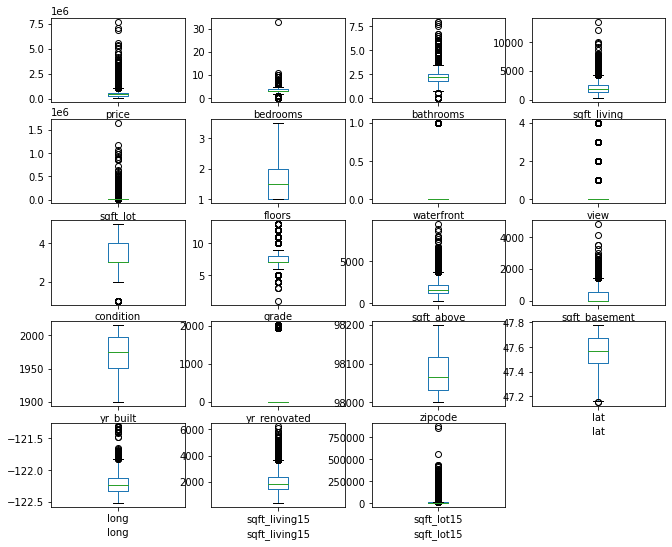


Histogram of each numerical features


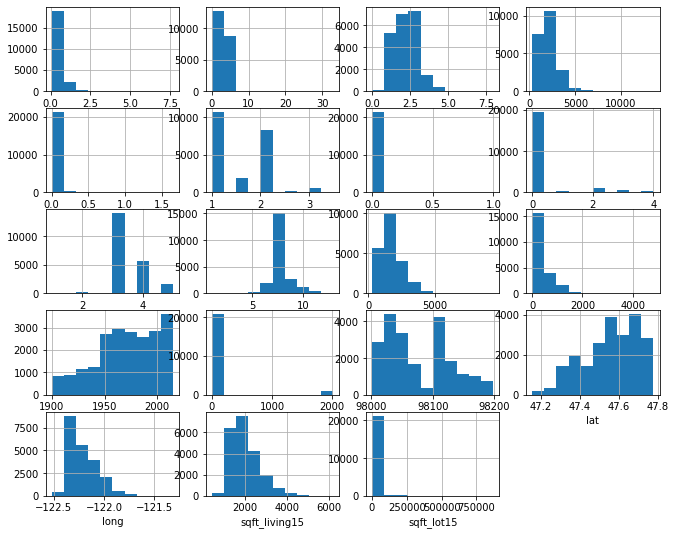

Pairplot

Correlation plot of numerical features
                  price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308350  ...       0.585379    0.082447
bedrooms       0.308350  1.000000  ...       0.391638    0.029244
bathrooms      0.525138  0.515884  ...       0.568634    0.087175
sqft_living    0.702035  0.576671  ...       0.756420    0.183286
sqft_lot       0.089661  0.031703  ...       0.144608    0.718557
floors         0.256794  0.175429  ...       0.279885   -0.011269
waterfront     0.266369 -0.006582  ...       0.086463    0.030703
view           0.397293  0.079532  ...       0.280439    0.072575
condition      0.036362  0.028472  ...      -0.092824   -0.003406
grade          0.667434  0.356967  ...       0.713202    0.119248
sqft_above     0.605567  0.477600  ...       0.731870    0.194050
sqft_basement  0.323816  0.303093  ...       0.200355    0.017276
yr_built       0.054012  0.154178  ...       0.326229    0.070958
yr_renovated   0.126434  0.

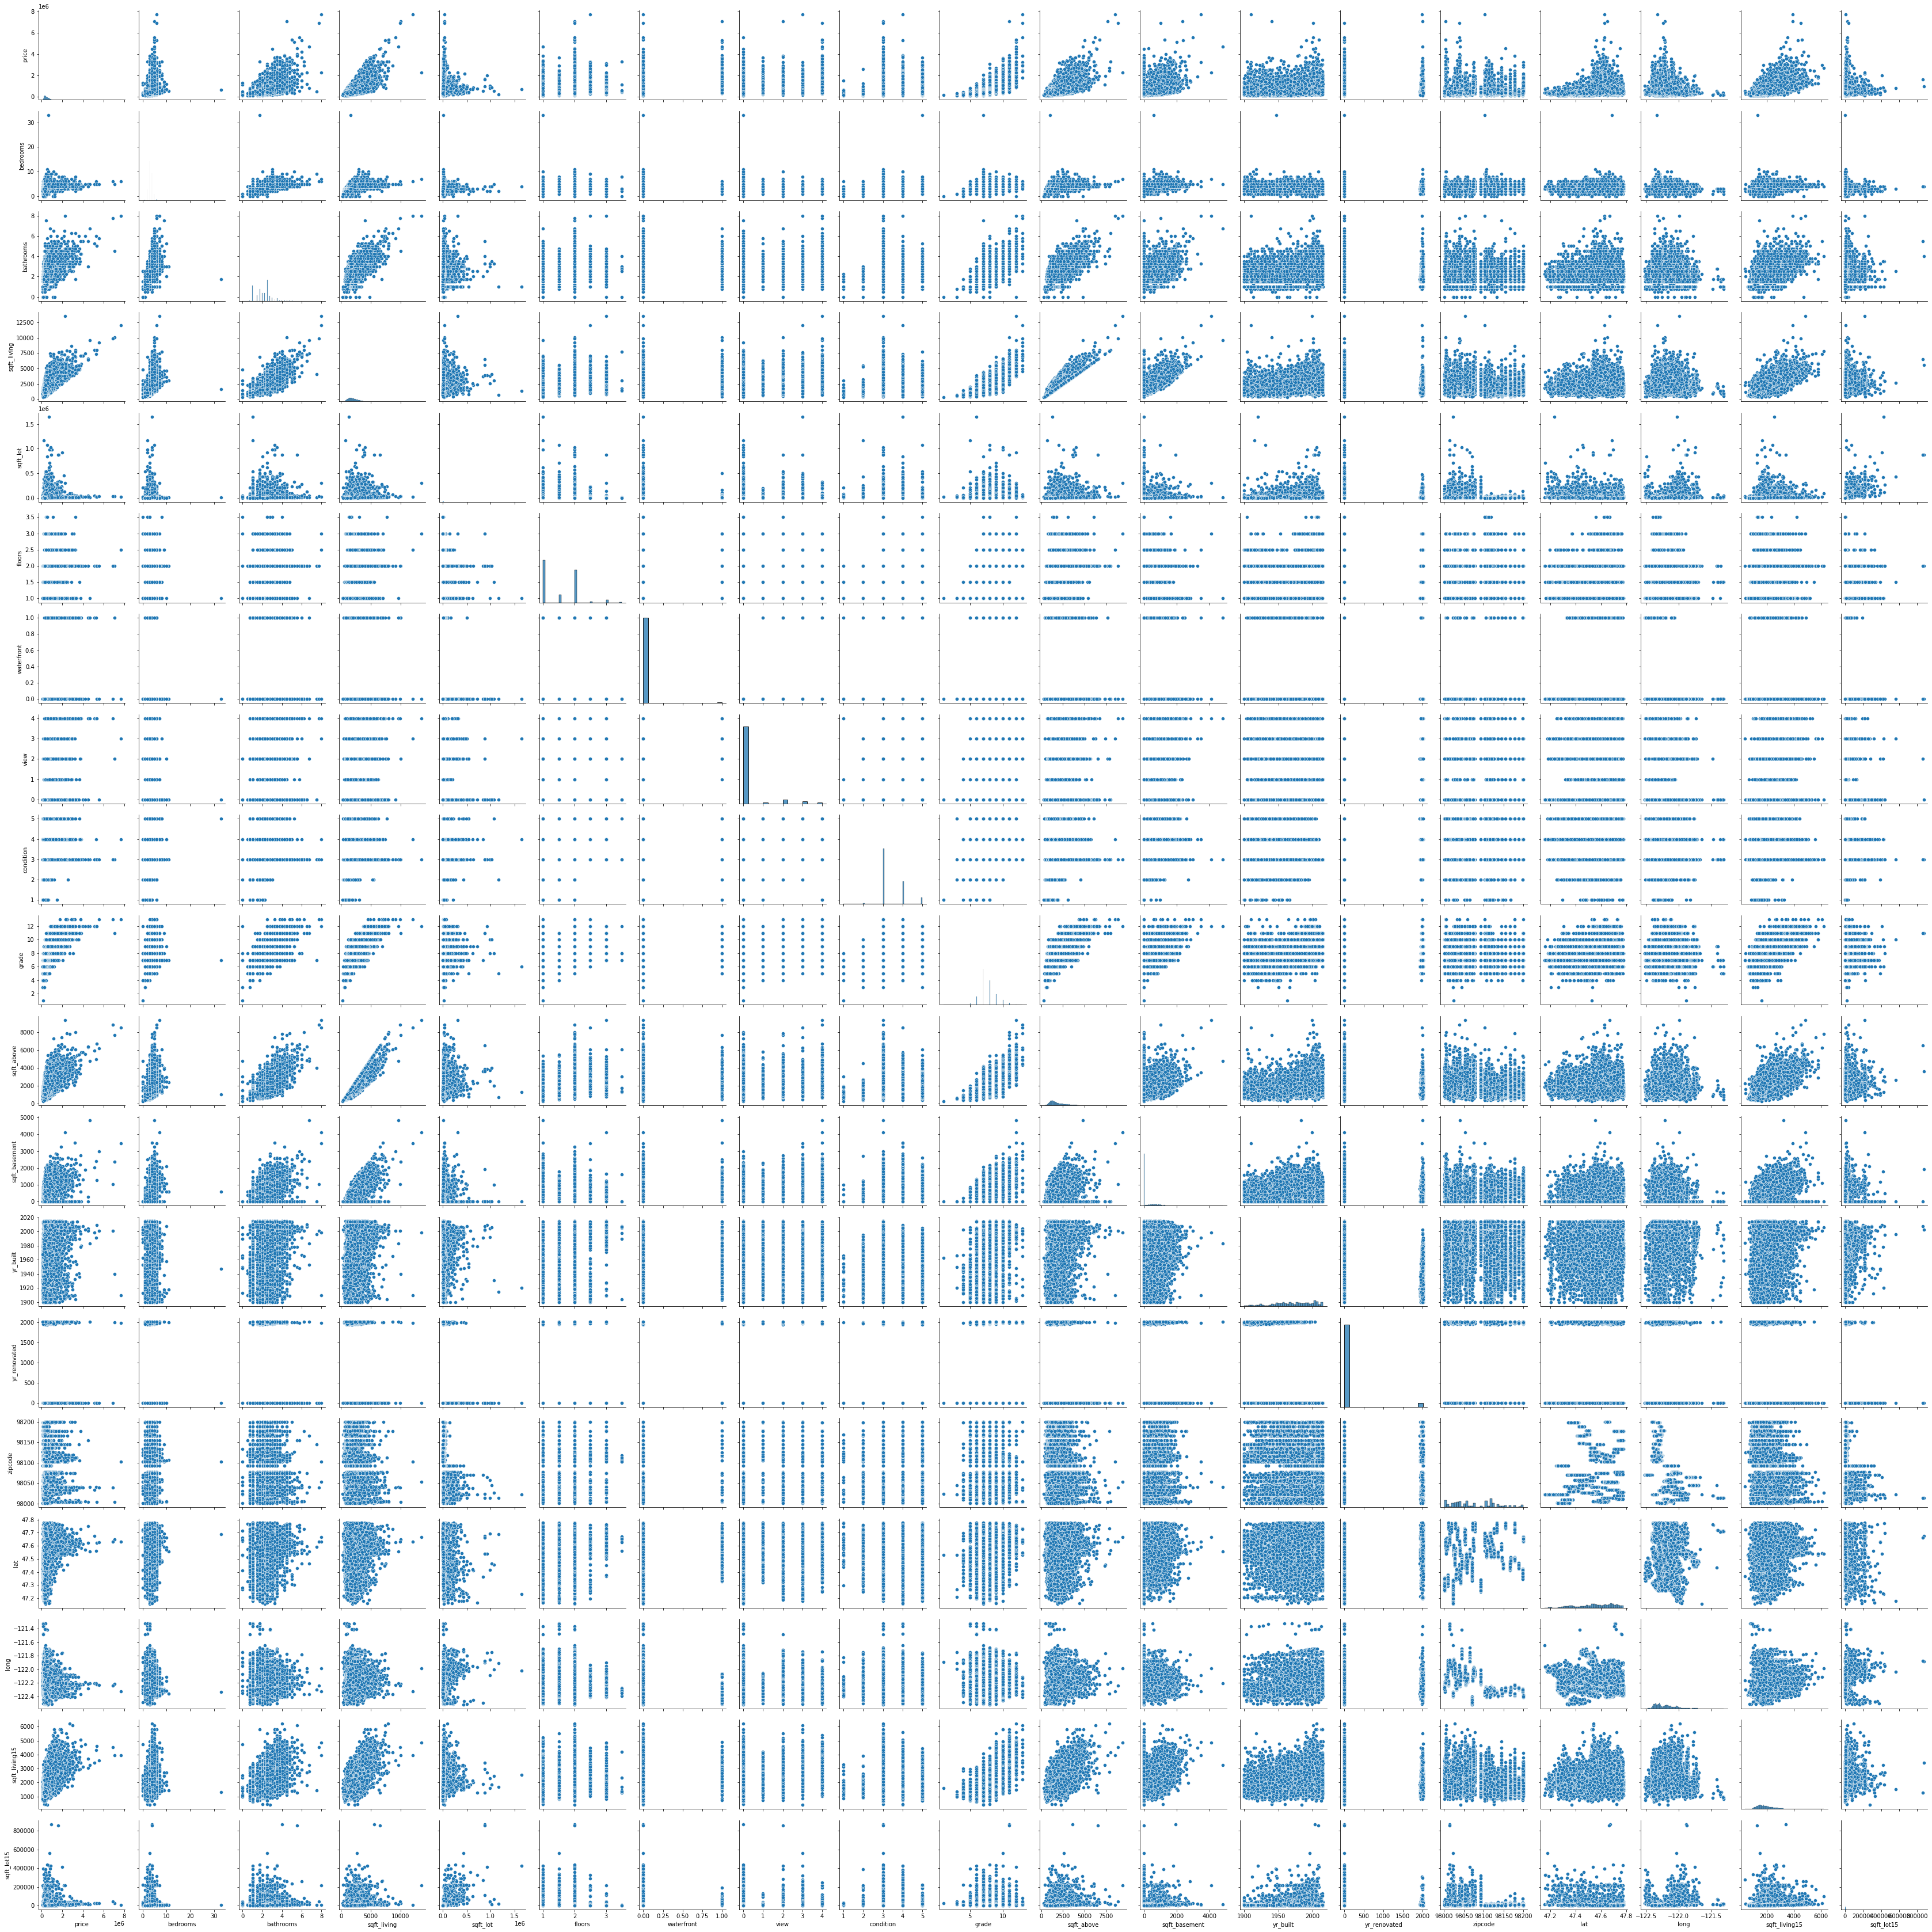

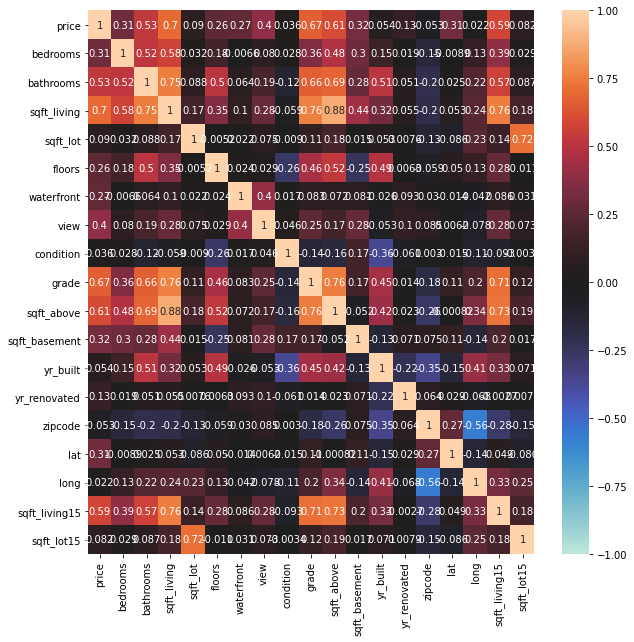

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

myhousing1 = housing.drop(["id", "date" ], axis = 1).copy()

feature_names = myhousing1.columns
target = "price"

def data_visulization(feature_names, target, dataset):
  i = 1
  print(); print('Box plot of each numerical features')
  plt.figure(figsize = (11, 9))
  for col in feature_names:
    plt.subplot(5,4,i)
    plt.axis('on')
    plt.tick_params(axis = 'both')
    myhousing1[col].plot(kind = "box", subplots = True, sharex = False, sharey = False)
    plt.xlabel(col)
    i += 1
  plt.show()

  j = 1
  print(); print('Histogram of each numerical features')
  plt.figure(figsize = (11, 9))
  for col in feature_names:
    plt.subplot(5,4,j)
    plt.axis('on')
    plt.tick_params(axis = 'both')
    myhousing1[col].hist()
    plt.xlabel(col)
    j += 1
  plt.show()

  print("Pairplot")
  sns.pairplot(myhousing1) #kind = "reg"

  print()
  print("Correlation plot of numerical features")

  corr = myhousing1[feature_names].corr()
  print(corr)

  #mask = np.zeros_like(corr, dtype = np.bool)
  #mask[np.triu_indices_from(mask)] = True
  f, ax = plt.subplots(figsize = (10,10))

  #cmap = sns.diverging_palette(220, 10, as_cmap = True)

  #sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1.0, vmin = 0.0,
              #linewidths = 0.5, cbar_kws = {"shrink": 0.5}, annot = True)
  sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, center = 0.0)
  plt.show()

data_visulization(feature_names, target, myhousing)

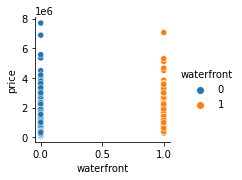

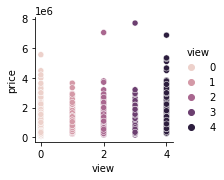

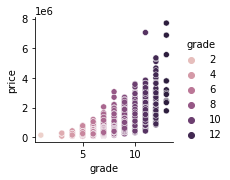

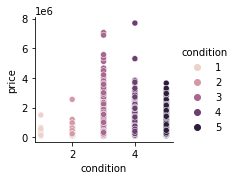

In [ ]:
sns.pairplot(myhousing, hue = "waterfront", y_vars = ["price"], x_vars = ["waterfront"])
sns.pairplot(myhousing, hue = "view", y_vars = ["price"], x_vars = ["view"])
sns.pairplot(myhousing, hue = "grade", y_vars = ["price"], x_vars = ["grade"])
sns.pairplot(myhousing, hue = "condition", y_vars = ["price"], x_vars = ["condition"])

In [ ]:
new_housing = housing.drop(["id", "date", "price", ], axis = 1).copy()

In [ ]:
X = housing.drop(["id", "date", "price", ], axis = 1).copy()
X = pd.get_dummies(X, columns=["zipcode"])
y = housing[["price"]].copy()

In [ ]:
# using all the features

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = xgb.XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

xgb.feature_importances_
sorted_idx = xgb.feature_importances_.argsort()

plt.barh(new_housing.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

[23:00:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


IndexError: ignored

In [ ]:
perm_importance = permutation_importance(xgb, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(new_housing.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

IndexError: ignored

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

clf = xgb.XGBRegressor(random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred)) 
print(f"RMSE : {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 : {r2}")

[23:00:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 149084.77035861823
R^2 : 0.8529782238211503


In [ ]:
score = clf.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9037355145430074


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[23:01:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[23:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

clf = xgb.XGBRegressor(random_state = 42)
clf.fit(X_train, y_train)

param_grid = param_grid = {'n_estimators':[100, 300, 400], 
           'max_depth': [3,4,10], 
           'learning_rate':[0.15, 0.1, 0.01], 
           'gamma':[0, 0.25, 1.0],
           'reg_lambda':[0, 1.0, 10.0]}

optimal_params = GridSearchCV(estimator = xgb.XGBRegressor( subsample = 0.9, colsample_bytree = 0.5, random_state = 42), param_grid = param_grid, verbose = 0, n_jobs = 4, cv = 5)
optimal_params.fit(X_train, y_train)

[01:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.5, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.15, 0.1, 0.01],
                   

In [ ]:
optimal_params.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
clf_bst = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

clf_bst.fit(X_train, y_train)

pred_bst = clf_bst.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred_bst))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, pred_bst)
print(f"R_sqared:{r2}")

AttributeError: ignored

In [ ]:
import pickle
# save the model to disk

filename = 'housing_model.sav'
pickle.dump(clf_bst, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

pred_bst = clf_bst.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred_bst))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, pred_bst)
print(f"R_sqared:{r2}")

[03:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 136404.53659841002
R_sqared:0.8769241814637816


Text(0.5, 0, 'Xgboost Feature Importance')

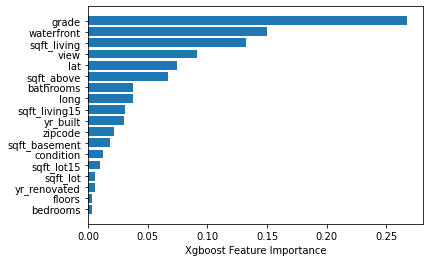

In [ ]:
clf_bst.feature_importances_
sorted_idx = clf_bst.feature_importances_.argsort()

plt.barh(new_housing.columns[sorted_idx], clf_bst.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Text(0.5, 0, 'Permutation Importance')

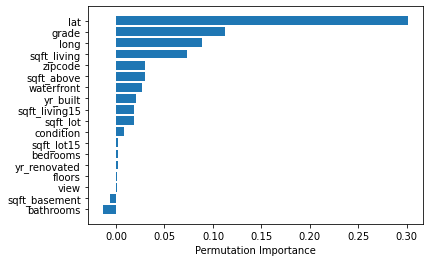

In [ ]:
perm_importance = permutation_importance(clf_bst, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(new_housing.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

New top 9 features: grade, waterfront, sqrt_living, view, lat, sqft_above, long, sqft_living, 15yr_built

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

house = housing[["price","sqft_living", "waterfront", "view", "grade", "sqft_above", "yr_built", "lat", "long", "sqft_living15"]]

X_new = house.drop(["price"], axis = 1).copy()
y_new = house["price"]

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

xgb_new = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)
xgb_new.fit(X_new_train, y_new_train)

pred_new = xgb_new.predict(X_new_test)

rmse2 = np.sqrt(MSE(y_new_test, pred_new))
print(f"RMSE: {rmse2}")
r_squared2 = r2_score(y_new_test, pred_new)
print(f"R_squared: {r_squared2}")

[22:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 135829.95593258762
R_squared: 0.8779588691060987


Text(0.5, 0, 'Xgboost Feature Importance')

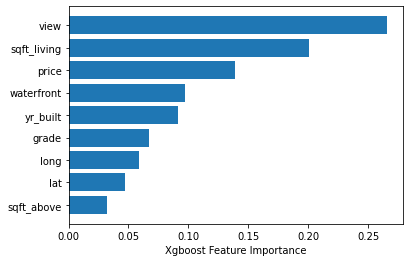

In [ ]:
xgb_new.feature_importances_
sorted_idx = xgb_new.feature_importances_.argsort()

plt.barh(house.columns[sorted_idx], xgb_new.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid1 = {'n_estimators':[400, 600, 800], 
           'max_depth': [4,5], 
           'learning_rate':[0.1], 
           'gamma':[0],
           'reg_lambda':[1.0],
           'booster':["gbtree", "bglinear"],
           'min_child_weight':[1,2,3,4],
           'base_score':[0.25, 0.5, 0.75, 1.0]}

optimal_params1 = GridSearchCV(estimator = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1), param_grid = param_grid1, verbose = 0, n_jobs = 4, cv = 5)
optimal_params1.fit(X_new_train, y_new_train)

[03:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.5, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=4,
                                    min_child_weight=1, missing=None,
                                    n_estimators=400, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, r...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'base_score': [0.25, 0.5, 0.75, 1.0],
                         'booster': ['gbtree', 'bglinear'], 'gamma': [0],
  

In [ ]:
optimal_params1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=2, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
xgb_new_bst = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=2, missing=None, n_estimators=1350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

xgb_new_bst.fit(X_new_train, y_new_train)

pred_xgb = xgb_new_bst.predict(X_new_test)
rmse3 = np.sqrt(MSE(y_new_test, pred_xgb))
print(f"RMSE: {rmse3}")
r_squared3 = r2_score(y_new_test, pred_xgb)
print(f"R_squared: {r_squared3}")

[00:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 132154.4547571744
R_squared: 0.8844742708619532


Text(0.5, 0, 'Xgboost Feature Importance')

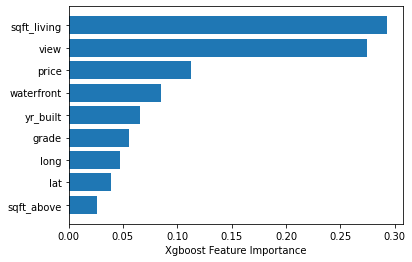

In [ ]:
xgb_new_bst.feature_importances_
sorted_idx = xgb_new_bst.feature_importances_.argsort()

plt.barh(house.columns[sorted_idx], xgb_new_bst.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
# Using the second optimal parameters with all the features

import xgboost as xgb

clf_bst = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=2, missing=None, n_estimators=1350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

clf_bst.fit(X_train, y_train)

pred_bst = clf_bst.predict(X_test)
rmse1 = np.sqrt(MSE(y_test, pred_bst))
print(f"RMSE: {rmse1}")
r_squared = r2_score(y_test, pred_bst)
print(f"R_squared: {r_squared}")

NameError: ignored

In [ ]:

clf_bst.feature_importances_
sorted_idx = clf_bst.feature_importances_.argsort()

plt.barh(house.columns[sorted_idx], clf_bst.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
import pickle
# save the model to disk

filename = 'better_housing_model.sav'
pickle.dump(clf_bst, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

pred_bst = clf_bst.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred_bst))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test, pred_bst)
print(f"R_sqared:{r2}")

[04:08:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 132048.06798594288
R_sqared:0.8846601966763611


# Normalized Data

In [ ]:
housing0 = housing.drop(["lat", "long", "id", "date"], axis = 1).copy()

from sklearn import preprocessing

housing_norm = preprocessing.MinMaxScaler().fit_transform(housing0[["price", "sqft_living", "sqft_lot", "sqft_above","sqft_basement", "bedrooms","bathrooms","floors", "waterfront","view","condition","grade", "yr_built", "yr_renovated", "sqft_living15","sqft_lot15"]])
housing_norm = pd.DataFrame(housing_norm)

housing_norm.columns = ["price", "sqft_living", "sqft_lot", "sqft_above","sqft_basement", "bedrooms","bathrooms","floors", "waterfront","view","condition","grade", "yr_built", "yr_renovated", "sqft_living15","sqft_lot15"]

#"bedroom","bathrooms","floors", "waterfront","view","condition","grade", "zipcode"
fea = ["zipcode"]

for f in fea:
  housing_norm[f] = housing[f]

housing_norm = pd.get_dummies(housing_norm, columns = ["zipcode"])

housing_norm.head()

price  sqft_living  sqft_lot  ...  zipcode_98188  zipcode_98198  zipcode_98199
0  0.019266     0.067170  0.003108  ...              0              0              0
1  0.060721     0.172075  0.004072  ...              0              0              0
2  0.013770     0.036226  0.005743  ...              0              0              0
3  0.069377     0.126038  0.002714  ...              0              0              0
4  0.057049     0.104906  0.004579  ...              0              0              0

[5 rows x 86 columns]

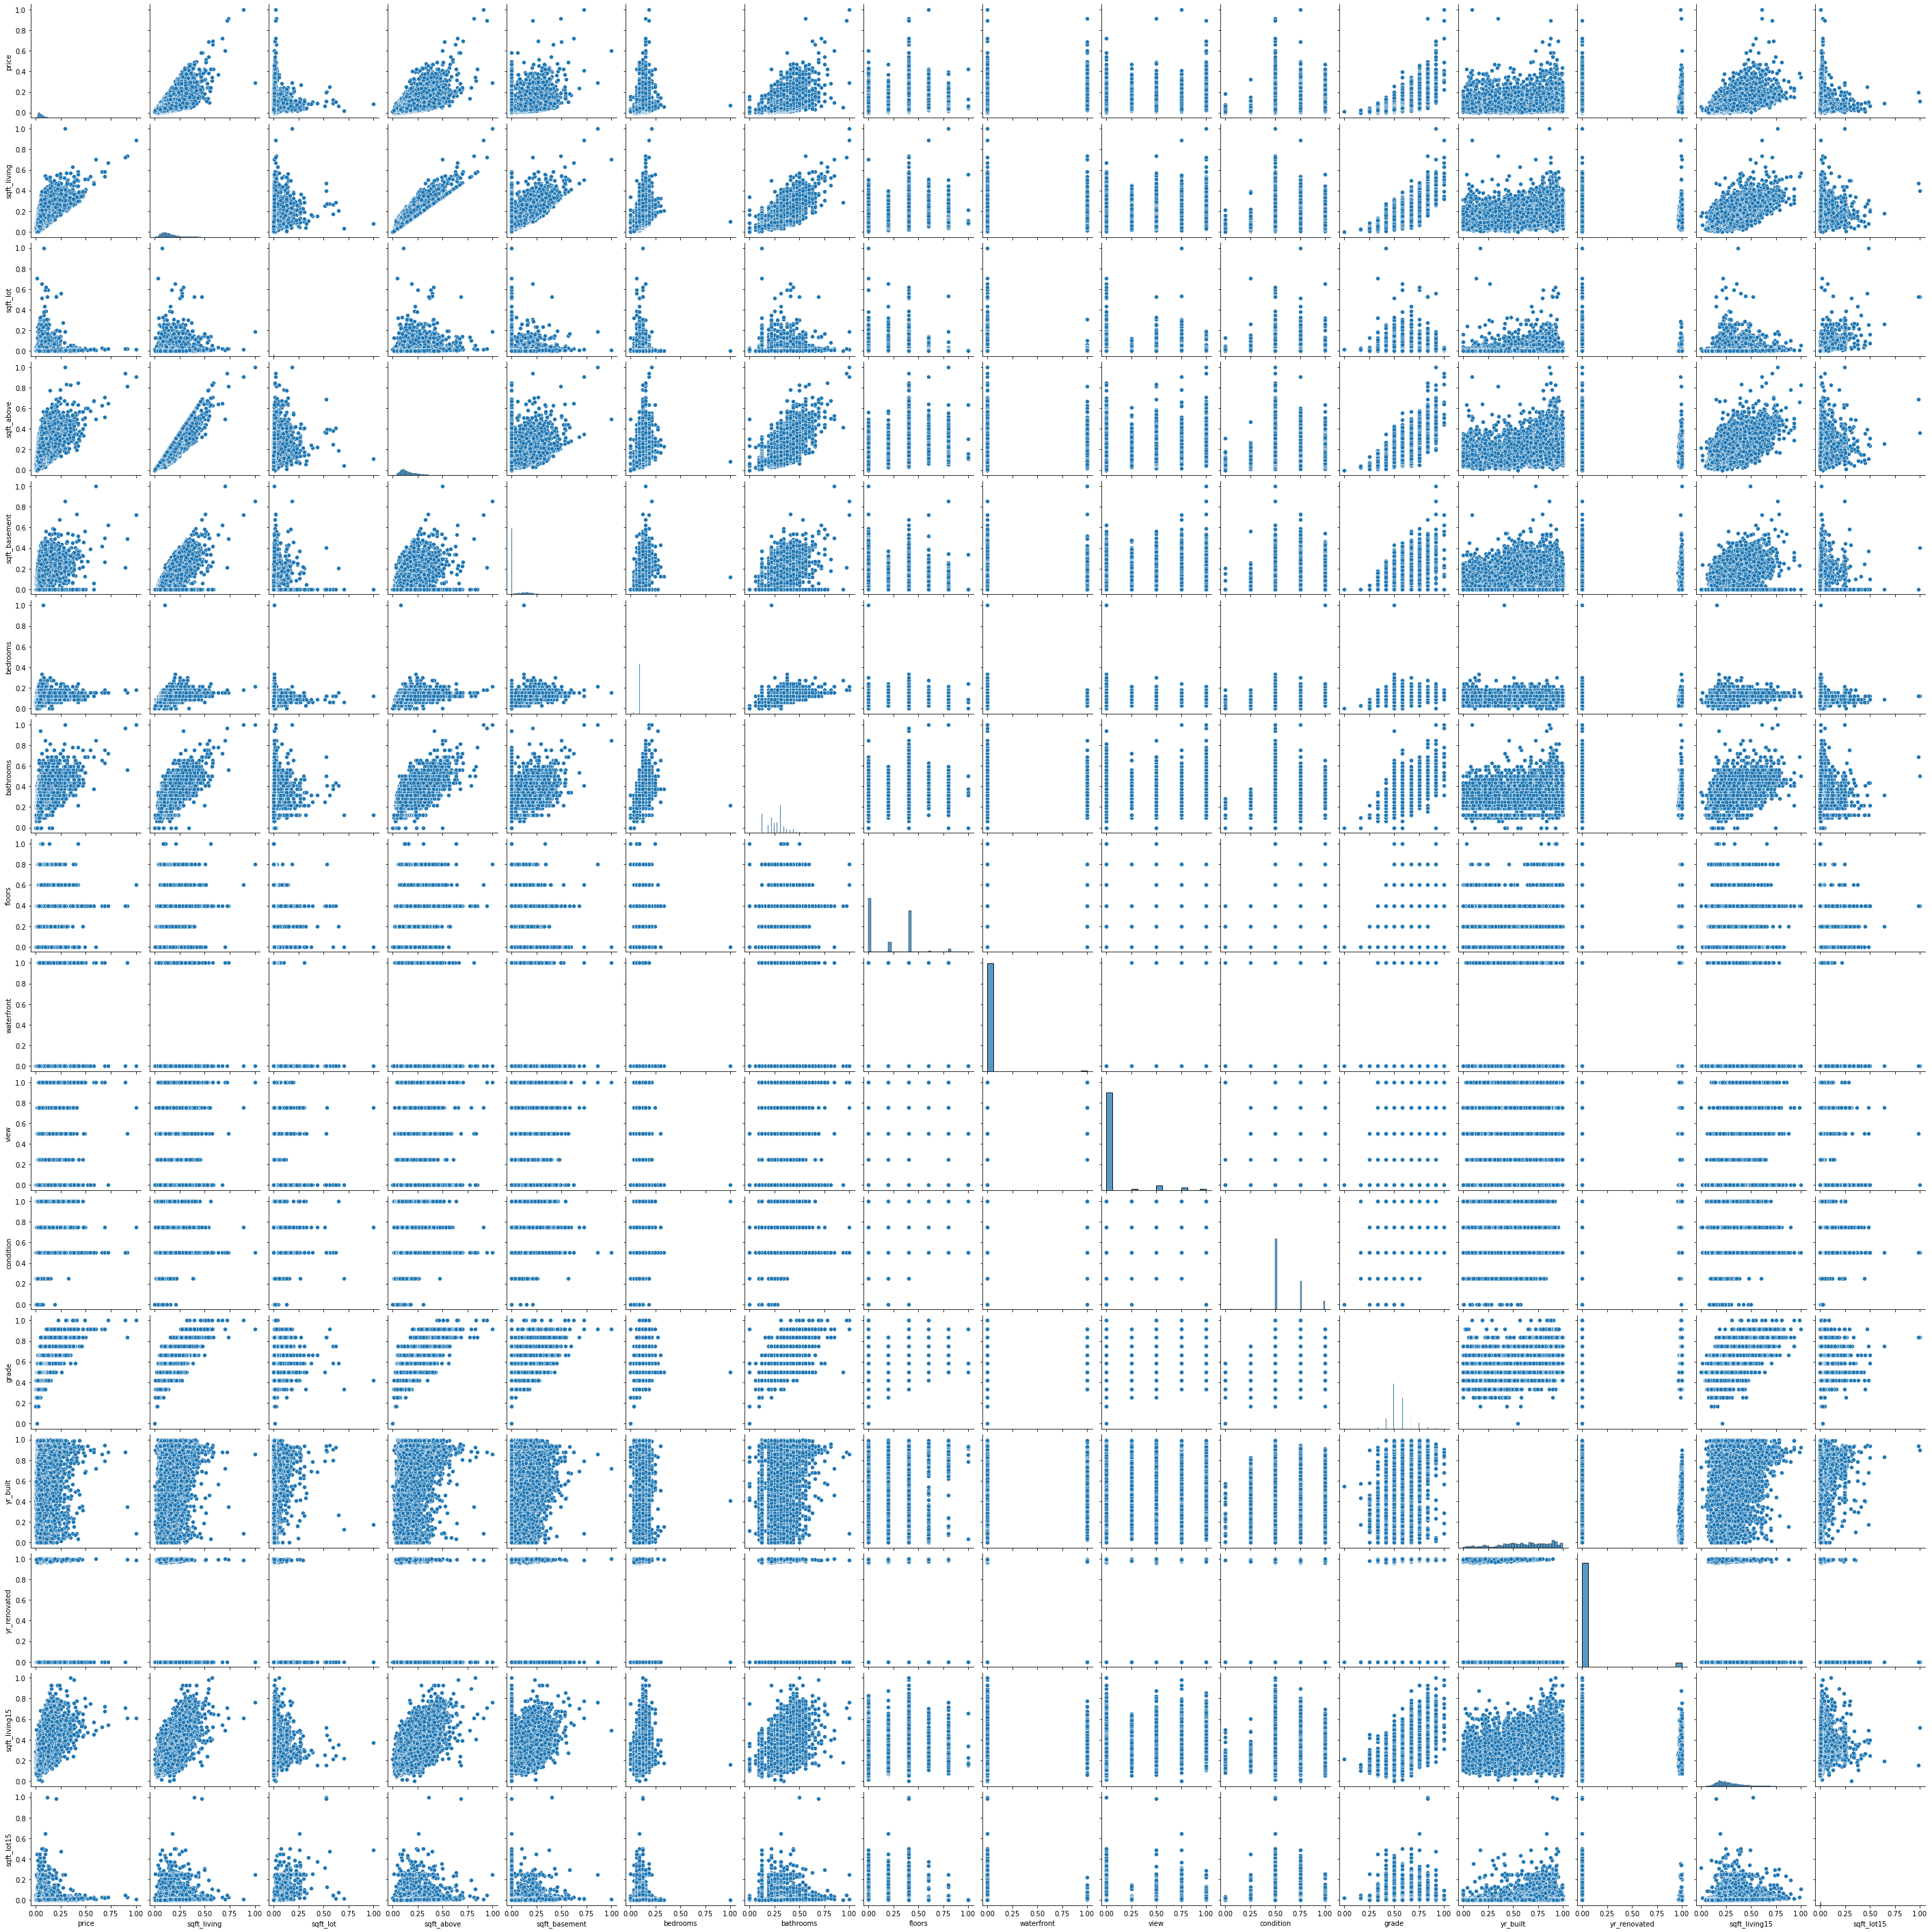

In [ ]:
import seaborn as sns
sns.pairplot(housing_norm[["price", "sqft_living", "sqft_lot", "sqft_above","sqft_basement", "bedrooms","bathrooms","floors", "waterfront","view","condition","grade", "yr_built", "yr_renovated", "sqft_living15","sqft_lot15"]])

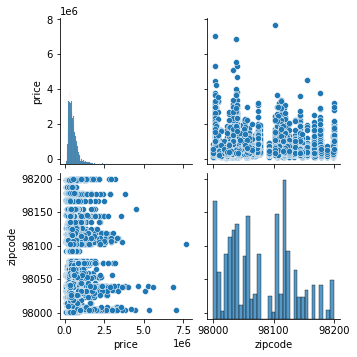

In [ ]:
sns.pairplot(housing[["price", "zipcode"]])

In [ ]:
housing_norm_edit = housing_norm[["price","sqft_living", "sqft_above","sqft_basement","bathrooms","condition","grade","sqft_living15","bedrooms","floors"]]
housing_norm_edit["zipcode"] = housing["zipcode"]
housing_norm_edit = housing_norm_edit[(housing_norm_edit["bedrooms"]<0.25) & (housing_norm_edit["floors"]<0.5)]
housing_norm_edit = pd.get_dummies(housing_norm_edit, columns = ["zipcode"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_norm = housing_norm.drop(["price"], axis = 1).copy()
y_norm = housing_norm["price"]

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size = 0.2, random_state = 42)

xgb_norm = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=3, missing=None, n_estimators=1200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

xgb_norm.fit(X_norm_train, y_norm_train)

pred_norm = xgb_norm.predict(X_norm_test)
rmse4 = np.sqrt(MSE(y_norm_test, pred_norm))
print(f"RMSE: {rmse4}")
r_squared4 = r2_score(y_norm_test, pred_norm)
print(f"R_squared: {r_squared4}")

[00:04:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.018815401691034257
R_squared: 0.8638487011085645


In [ ]:
X_norm = housing_norm_edit.drop(["price"], axis = 1).copy()
y_norm = housing_norm_edit["price"]

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size = 0.2, random_state = 42)

xgb_norm = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=2, missing=None, n_estimators=1200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

xgb_norm.fit(X_norm_train, y_norm_train)

pred_norm = xgb_norm.predict(X_norm_test)
rmse4 = np.sqrt(MSE(y_norm_test, pred_norm))
print(f"RMSE: {rmse4}")
r_squared4 = r2_score(y_norm_test, pred_norm)
print(f"R_squared: {r_squared4}")

[00:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.01983335494329247
R_squared: 0.8321356637417732


Text(0.5, 0, 'Xgboost Feature Importance')

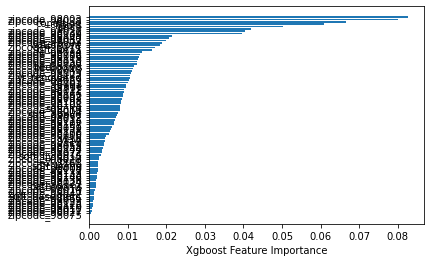

In [ ]:
xgb_norm.feature_importances_
sorted_idx = xgb_norm.feature_importances_.argsort()

plt.barh(housing_norm.columns[sorted_idx], xgb_norm.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
housing_norm.columns[sorted_idx]

IndexError: ignored

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Grabbing the digits that correspond with month and converting it into an integer
housing["month"] = housing["date"].str.split("T").str.get(0).str[4:6].astype(int)

X = housing.drop(columns=["price", "date", "id"])
y = housing["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=2, missing=None, n_estimators=1350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)
kfold = KFold(n_splits=3, random_state=43, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring="r2")

print(f"Accuracy: {results.mean()*100} STD: {results.std()*100}")